In [ ]:
import sys
import pandas as pd
import numpy as np
import multianndata as mad
import cna
import scanpy as sc
from matplotlib import pyplot as plt
# from plotnine import (
#     ggplot,
#     aes,
#     stage,
#     geom_violin,
#     geom_point,
#     geom_line,
#     geom_boxplot,
#     guides,
#     scale_fill_manual,
#     theme,
#     theme_classic,
# )

ImportError: /lib64/libz.so.1: version `ZLIB_1.2.9' not found (required by /directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/matplotlib/../../.././libpng16.so.16)

In [ ]:
# parameters
resolution = "major_cell_types"
analysis_name = "no_expr_pc_covars"
celltype = "Monocyte"

In [ ]:
# read in the multi anndata with GeNA phenotype information 
madata = cna.read(
    f"/directflow/SCCGGroupShare/projects/blabow/tenk10k_phase1/data_processing/csa_qtl/output/multianndata/{resolution}/{analysis_name}/{celltype}_scDataObject.dimreduc.pca.gena_pheno.h5ad"
)

Only considering the two last: ['.gena_pheno', '.h5ad'].
Only considering the two last: ['.gena_pheno', '.h5ad'].


In [ ]:
madata.obs

id sequencing_library    cohort  \
AAACGAAGTGTCGATT_S0056a  CPG247833             S0056a  BioHEART   
AAAGAACAGGGACTGT_S0056a  CPG248708             S0056a  BioHEART   
AAAGGATGTGGCAGAT_S0056a  CPG248708             S0056a  BioHEART   
AAAGGGCAGAGTTGTA_S0056a  CPG247833             S0056a  BioHEART   
AAAGGTACATTGAAAG_S0056a  CPG247833             S0056a  BioHEART   
...                            ...                ...       ...   
TTTGTTGAGAAACCCG_S0176   CPG500348              S0176  BioHEART   
TTTGTTGCAGTAGTTC_S0176   CPG500025              S0176  BioHEART   
TTTGTTGCAGTCAGCC_S0176   CPG500249              S0176  BioHEART   
TTTGTTGGTGCTGCAC_S0176   CPG500082              S0176  BioHEART   
TTTGTTGGTTGTGTAC_S0176   CPG500025              S0176  BioHEART   

                        wg2_scpred_prediction  npheno_1:143272092:A:T  \
AAACGAAGTGTCGATT_S0056a             CD16_Mono                0.042885   
AAAGAACAGGGACTGT_S0056a             CD14_Mono                0.087058   
AAAGGATGTGGCAGAT_S0056a             CD14_Mono                0.184999   
AAAGGGCAGAGTTGTA_S0056a             CD14_Mono                0.046604   
AAAGGTACATTGAAAG_S0056a             CD14_Mono                0.182839   
...                                       ...                     ...   
TTTGTTGAGAAACCCG_S0176              CD14_Mono               -0.300049   
TTTGTTGCAGTAGTTC_S0176              CD14_Mono               -0.254389   
TTTGTTGCAGTCAGCC_S0176              CD14_Mono               -0.300166   
TTTGTTGGTGCTGCAC_S0176              CD14_Mono               -0.263297   
TTTGTTGGTTGTGTAC_S0176              CD14_Mono               -0.278485   

                         npheno_2:16395367:G:GACACACACACACCACACACACCTCACACACCACAGAGACACACACACCTCACACACCATAGAGACACACACACCTCACACACCATAGAGACACACACACCTCACACACCATAGAGAC  \
AAACGAAGTGTCGATT_S0056a                                          -0.036517                                                                                            
AAAGAACAGGGACTGT_S0056a                                          -0.049260                                                                                            
AAAGGATGTGGCAGAT_S0056a                                          -0.195474                                                                                            
AAAGGGCAGAGTTGTA_S0056a                                          -0.060723                                                                                            
AAAGGTACATTGAAAG_S0056a                                          -0.133048                                                                                            
...                                                                    ...                                                                                            
TTTGTTGAGAAACCCG_S0176                                            0.252872                                                                                            
TTTGTTGCAGTAGTTC_S0176                                            0.186091                                                                                            
TTTGTTGCAGTCAGCC_S0176                                            0.245140                                                                                            
TTTGTTGGTGCTGCAC_S0176                                            0.208134                                                                                            
TTTGTTGGTTGTGTAC_S0176                                            0.214367                                                                                            

                         npheno_22:19725903:TCG:T  npheno_12:121634368:T:G  \
AAACGAAGTGTCGATT_S0056a                 -0.019607                 0.023065   
AAAGAACAGGGACTGT_S0056a                 -0.067470                 0.056251   
AAAGGATGTGGCAGAT_S0056a                 -0.182209                 0.169330   
AAAGGGCAGAGTTGTA_S0056a          

In [ ]:
madata.obs.shape

(318954, 117)

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


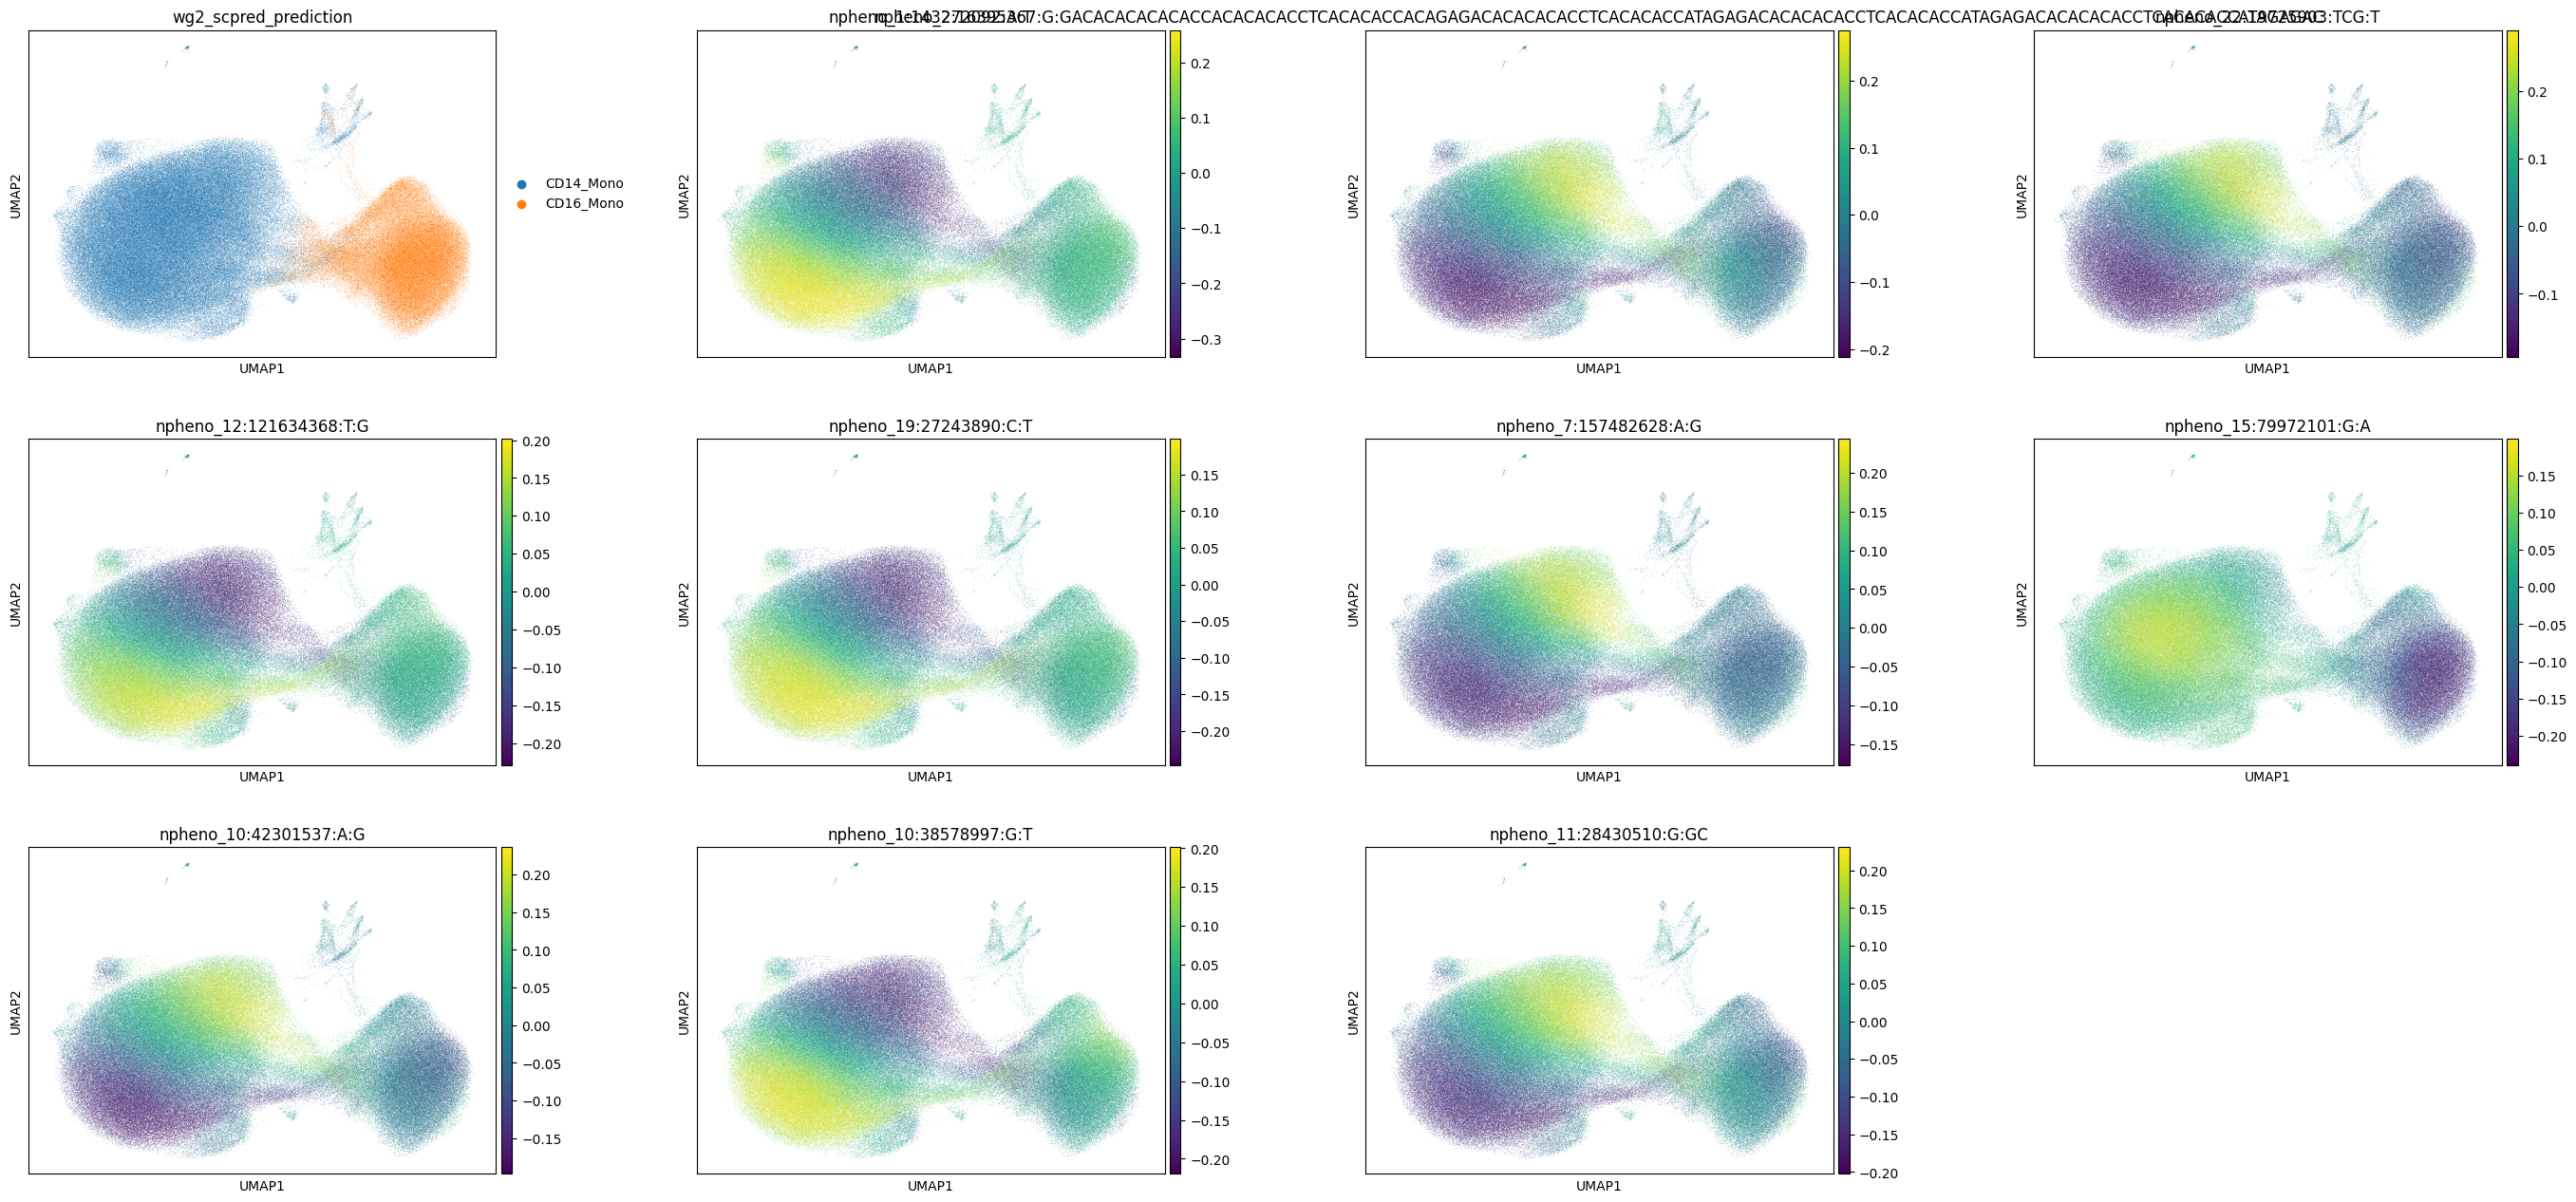

In [ ]:
# plot neighbourhood abundance correllations

sc.pl.umap(
    madata,
    color=["wg2_scpred_prediction"] + madata.obs.columns[4:14].tolist(),
    wspace=0.3,
)

# Validation - replicating Onek1k csaQTLs

/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


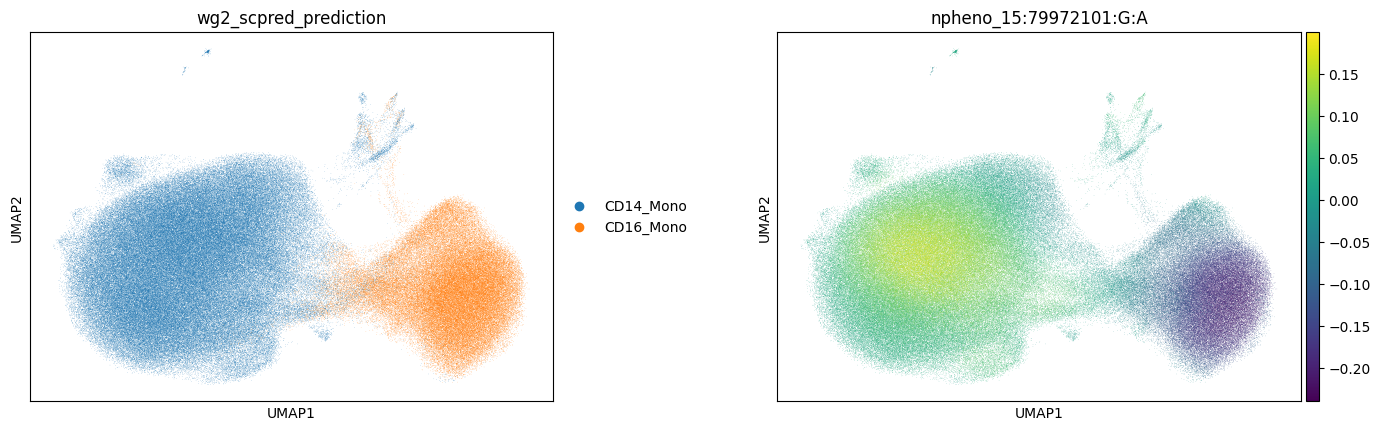

In [ ]:
onek1k_intersecting_myeloid = [
    "npheno_15:79972101:G:A",
]
sc.pl.umap(
    madata,
    color=["wg2_scpred_prediction"] + onek1k_intersecting_myeloid,
    wspace=0.3,
)

Here we can see replication of the csaQTL discovered in the onek1k cohort. This is most obvious for 15:79972101:G:A, where the alternate allele is associated with depletion of the CD16 monocytes. 

# explore csaQTL that are intersecting with cell type specific eQTL     


/directflow/SCCGGroupShare/projects/blabow/.conda/envs/gena-env/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


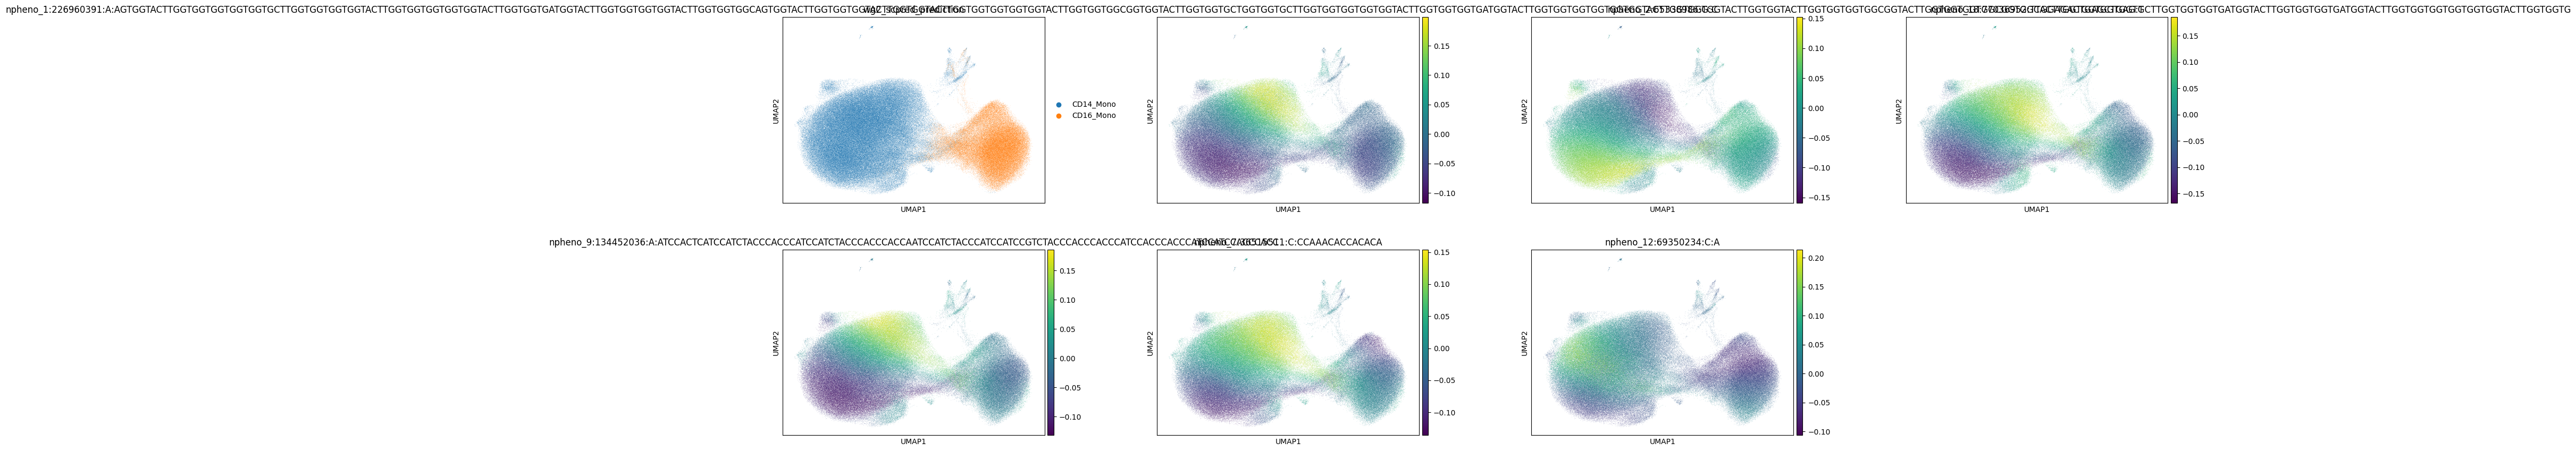

In [ ]:
intersecting_eqtl_list = [
    "npheno_1:226960391:A:AGTGGTACTTGGTGGTGGTGGTGGTGCTTGGTGGTGGTGGTACTTGGTGGTGGTGGTGGTACTTGGTGGTGATGGTACTTGGTGGTGGTGGTACTTGGTGGTGGCAGTGGTACTTGGTGGTGGTACTTGGTGGTACTTGGTGGTGGTGGTGGTACTTGGTGGTGGCGGTGGTACTTGGTGGTGCTGGTGGTGCTTGGTGGTGGTGGTGGTACTTGGTGGTGGTGATGGTACTTGGTGGTGGTGGTGGTGGTACTTGGTGGTGGTACTTGGTGGTACTTGGTGGTGGTGGCGGTACTTGGTGGTGGTGGCGGTGGCACTTGGTGGTGGTGGTGCTTGGTGGTGGTGATGGTACTTGGTGGTGGTGATGGTACTTGGTGGTGGTGGTGGTGGTACTTGGTGGTG",
    "npheno_2:65338986:G:C",
    "npheno_18:77036952:TTGGAGACTGAGCTGAG:T",
    "npheno_9:134452036:A:ATCCACTCATCCATCTACCCACCCATCCATCTACCCACCCACCAATCCATCTACCCATCCATCCGTCTACCCACCCACCCATCCACCCACCCATCCATCCACCCACC",
    "npheno_7:36515511:C:CCAAACACCACACA",
    "npheno_12:69350234:C:A"
]

sc.pl.umap(
    madata,
    color=["wg2_scpred_prediction"] + intersecting_eqtl_list,
    wspace=0.3,
)

In [ ]:
madata.samplem.columns

In [ ]:
madata.samplem

sex   age  geno_PC1  geno_PC2  geno_PC3  geno_PC4  geno_PC5  \
id                                                                       
CPG247833  2.0  49.0  0.005832  0.011282  0.000381  0.012024  0.008526   
CPG248708  1.0  59.0  0.120278  0.109528  0.092017  0.116055 -0.031580   
CPG248245  1.0  51.0  0.008697  0.011537  0.007475  0.010963  0.008445   
CPG247858  2.0  69.0  0.044986  0.052252  0.029080  0.046873 -0.006097   
CPG249003  2.0  60.0  0.000956  0.012564 -0.001645  0.008171  0.012879   
...        ...   ...       ...       ...       ...       ...       ...   
CPG508150  1.0  74.0 -0.003713  0.001856  0.000541 -0.000084  0.006606   
CPG500082  1.0  54.0 -0.000092  0.004406  0.001033 -0.000681  0.006846   
CPG500249  1.0  59.0 -0.006509  0.001157 -0.003340 -0.001321  0.005336   
CPG500348  1.0  58.0 -0.000166  0.005107  0.003899  0.001486  0.008710   
CPG500025  2.0  64.0 -0.002763  0.002682  0.000807  0.002403  0.004059   

           geno_PC6  geno_PC7  geno_PC8  ...  spheno_7:154660574:C:T  \
id                                       ...                           
CPG247833 -0.002930 -0.035403  0.006086  ...               -0.071243   
CPG248708  0.003927  0.034910  0.018746  ...                0.059387   
CPG248245 -0.005821 -0.020976  0.003033  ...               -0.206022   
CPG247858 -0.004978 -0.008315  0.016663  ...                0.039726   
CPG249003 -0.003057 -0.031736  0.011326  ...               -0.061825   
...             ...       ...       ...  ...                     ...   
CPG508150 -0.000956 -0.011250  0.003460  ...                0.092844   
CPG500082 -0.002957 -0.021973  0.004774  ...                0.280648   
CPG500249  0.002344 -0.006785  0.004892  ...                0.247624   
CPG500348  0.004008 -0.005422  0.006414  ...                0.148689   
CPG500025 -0.000727 -0.010627 -0.001743  ...                0.215804   

           spheno_13:30844562:C:CTGTGGTGTGTATGTGGTGTGTGTATGTGGTGTGCGTGTA  \
id                                                                         
CPG247833                                          -0.078641               
CPG248708                                           0.043053               
CPG248245                                          -0.203418               
CPG247858                                           0.091570               
CPG249003                                          -0.073295               
...                                                      ...               
CPG508150                                           0.092864               
CPG500082                                           0.277736               
CPG500249                                           0.242282               
CPG500348                                           0.163665               
CPG500025                                           0.233176               

           spheno_5:17389869:A:G  spheno_3:194324909:A:G  \
id                                                         
CPG247833               0.078780                0.073436   
CPG248708              -0.041831                     NaN   
CPG248245               0.203184                0.192695   
CPG247858              -0.095382               -0.022355   
CPG249003               0.073804                0.114872   
...                          ...                     ...   
CPG508150              -0.092893                0.014548   
CPG500082              -0.277663               -0.685038   
CPG500249              -0.242074               -0.298129   
CPG500348              -0.164803               -0.291245   
CPG500025              -0.234676               -0.516293   

           spheno_4:91999093:TATTATATATATAA:T  \
id                                              
CPG247833                           -0.094077   
CPG248708                            0.048058   
CPG248245                           -0.223349   
CPG247858                            0.159798   
CPG249003                           -0.092887  

In [ ]:
sample_pheno

spheno_2:65338986:G:C  2:65338986:G:C Genotype
id                                                       
CPG247833               0.031440             0.0      G/G
CPG248708               0.030450             1.0      G/C
CPG248245               0.321165             1.0      G/C
CPG247858              -0.084535             0.0      G/G
CPG249003               0.092440             0.0      G/G
...                          ...             ...      ...
CPG508150              -0.093167             0.0      G/G
CPG500082              -0.655655             0.0      G/G
CPG500249              -0.200953             0.0      G/G
CPG500348              -0.291716             0.0      G/G
CPG500025              -0.455817             0.0      G/G

[1919 rows x 3 columns]

In [ ]:
variant = "2:65338986:G:C"

sample_pheno = madata.samplem[[f"spheno_{variant}", variant]]

# Convert dosage from numeric encoding to actual genotypes
# genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

def geno_to_letters(ref, alt, geno):
    if geno == 0:
        out = f"{ref}/{ref}"
    elif geno == 1:
        out = f"{ref}/{alt}"
    elif geno == 2:
        out = f"{alt}/{alt}"
    elif geno == -9 or np.isnan(geno):
        out = "Missing genotype"
    else:
        raise ValueError(f"Unexpected genotype value: {geno}")
    return out

ref, alt = variant.split(":")[2:4]

sample_pheno["Genotype"] = [
    geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
]

(
    ggplot(sample_pheno, aes(x="Genotype", y=f"spheno_{variant}")) + 
        geom_violin()
)

NameError: name 'madata' is not defined

In [ ]:
def csaqtl_boxplot(madata, variant_id_list):

    for variant in variant_id_list:
        variant = "2:111050100:G:A"
        sample_pheno = madata.samplem[[f"npheno_{variant}", variant]]
        sample_pheno.index = madata.uns["NAM_sampleXpc"].index

        # Convert dosage from numeric encoding to actual genotypes
        genotypes_dict = {v: v.split(":")[2:4] for v in variant_id_list}

        def geno_to_letters(ref, alt, geno):
            if geno == 0:
                out = f"{ref}/{ref}"
            elif geno == 1:
                out = f"{ref}/{alt}"
            elif geno == 2:
                out = f"{alt}/{alt}"
            elif geno == -9:
                out = "Missing genotype"
            return out

        ref, alt = genotypes_dict[variant]

        sample_pheno["Genotype"] = [
            geno_to_letters(ref, alt, g) for g in sample_pheno[variant]
        ]

        plot_order = [f"{ref}/{ref}", f"{ref}/{alt}", f"{alt}/{alt}"]

        sns.set_theme(style="darkgrid")
        ax = sns.boxplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            showfliers=False,
            order=plot_order
        )
        ax = sns.swarmplot(
            data=sample_pheno,
            x=f"{variant}",
            y="Sample-level phenotype",
            color="grey",
            size=1,
            # order=plot_order,
        ).set(title=f"{celltype}, P = {P}, {permuted}")
        # plt.savefig(
        #     fname=f"{figdir}/{resolution}/boxplots/intersections_real_geno/{celltype}_{analysis_name}_{variant}_intersecting_curated_deficiency_genes_box_plot.png",
        #     dpi=300,
        # )
        # plt.clf()
        plt.show()